## GA - BipedalWalker Analysis

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), os.pardir, "../src/"))

In [3]:
import visualization
import loss_analysis

/Users/roberta/miniconda3/envs/deep-learning/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Using TensorFlow backend.


In [4]:
import importlib
importlib.reload(visualization)
importlib.reload(loss_analysis)

<module 'loss_analysis' from '/Users/roberta/Desktop/deep-learning/results/bipedalwalker_td3/../../src/loss_analysis.py'>

In [5]:
name = 'BipedalWalker GA - '

### Scores

In [6]:
scores = np.load('../bipedalwalker_genetic/scores_fin.npy')

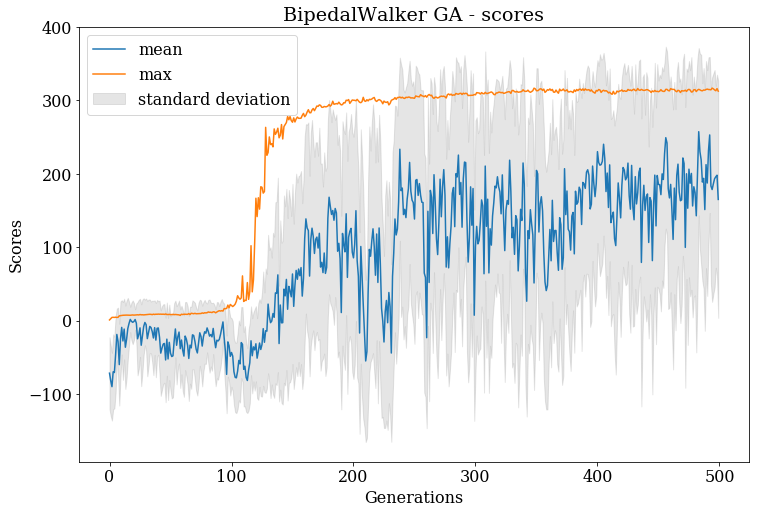

In [7]:
visualization.plot_scores_generations(scores, title=name + 'scores')

### 1. Convergence speed

In [8]:
weights_init = np.load('../bipedalwalker_genetic/first_agent.npy')
weights_fin = np.load('../bipedalwalker_genetic/best_agent.npy')

In [14]:
weights_init.shape

(8,)

In [16]:
weights_fin[0].shape

(24, 128)

In [9]:
%%time
inter_results, alphas = loss_analysis.interpolate(weights_init, weights_fin, loss_analysis.execute_agent_multiple_times, n_steps=80)

CPU times: user 1min 8s, sys: 7.37 s, total: 1min 15s
Wall time: 28.6 s


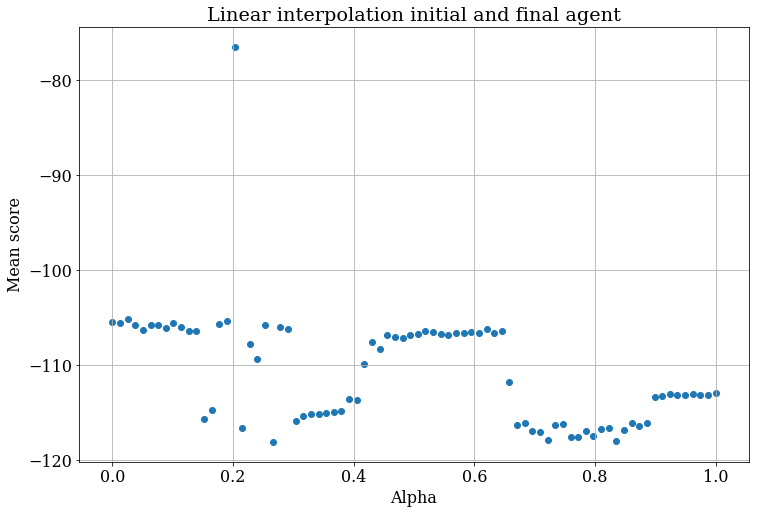

<Figure size 864x576 with 0 Axes>

In [10]:
visualization.plot_interpolation(alphas, inter_results)

In [11]:
from population import Agent

In [12]:
agent = Agent(weights=weights_fin)

In [13]:
agent.run_agent()

-112.98693761853936